# EDA > Distribution

<div class="alert alert-info">Analyze and visualize data distributions</div>

The `distr` function provides summary statistics and distribution plots for numeric, categorical, and other variable types in your data.

In [1]:
import polars as pl
import pyrsm as rsm

## setup pyrsm for autoreload
%reload_ext autoreload
%autoreload 2
%aimport pyrsm

# Diamonds Dataset

The diamonds dataset contains prices and attributes of 3,000 diamonds. It includes numeric, categorical, and date columns.

In [2]:
diamonds = pl.read_parquet("https://github.com/radiant-ai-hub/pyrsm/raw/refs/heads/main/examples/data/data/diamonds.parquet")
diamonds.head()

price,carat,clarity,cut,color,depth,table,x,y,z,date
i32,f64,enum,enum,enum,f64,f64,f64,f64,f64,date
580,0.32,"""VS1""","""Ideal""","""H""",61.0,56.0,4.43,4.45,2.71,2012-02-26
650,0.34,"""SI1""","""Very Good""","""G""",63.4,57.0,4.45,4.42,2.81,2012-02-26
630,0.3,"""VS2""","""Very Good""","""G""",63.1,58.0,4.27,4.23,2.68,2012-02-26
706,0.35,"""VVS2""","""Ideal""","""H""",59.2,56.0,4.6,4.65,2.74,2012-02-26
1080,0.4,"""VS2""","""Premium""","""F""",62.6,58.0,4.72,4.68,2.94,2012-02-26


In [3]:
rsm.md("https://raw.githubusercontent.com/radiant-ai-hub/pyrsm/refs/heads/main/examples/data/data/diamonds_description.md")

## Diamond prices

Prices of 3,000 round cut diamonds

### Description

A dataset containing the prices and other attributes of a sample of 3000 diamonds. The variables are as follows:

### Variables

- price = price in US dollars ($338--$18,791)
- carat = weight of the diamond (0.2--3.00)
- clarity = a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- cut = quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color = diamond color, from J (worst) to D (best)
- depth = total depth percentage = z / mean(x, y) = 2 * z / (x + y) (54.2--70.80)
- table = width of top of diamond relative to widest point (50--69)
- x = length in mm (3.73--9.42)
- y = width in mm (3.71--9.29)
- z = depth in mm (2.33--5.58)
- date = shipment date

### Additional information

<a href="http://www.diamondse.info/diamonds-clarity.asp" target="_blank">Diamond search engine</a>


## Basic Usage

By default, `distr` analyzes all columns and categorizes them as numeric, categorical, or other (date, datetime, etc.).

In [4]:
rsm.eda.distr(diamonds).summary()

Distribution Analysis
Data    : Not provided
Columns : 11 (7 numeric, 3 categorical, 1 other)

--- Numeric Variables ---
┌───────────┬──────────┬───────┬────────┬────────┬───────┬───────┬───────┐
│ statistic ┆ price    ┆ carat ┆ depth  ┆ table  ┆ x     ┆ y     ┆ z     │
╞═══════════╪══════════╪═══════╪════════╪════════╪═══════╪═══════╪═══════╡
│ mean      ┆ 3907.186 ┆ 0.794 ┆ 61.753 ┆ 57.465 ┆ 5.722 ┆ 5.723 ┆ 3.533 │
│ median    ┆ 2407.0   ┆ 0.7   ┆ 61.9   ┆ 57.0   ┆ 5.71  ┆ 5.72  ┆ 3.52  │
│ min       ┆ 338.0    ┆ 0.2   ┆ 54.2   ┆ 50.0   ┆ 3.73  ┆ 3.71  ┆ 2.33  │
│ max       ┆ 18791.0  ┆ 3.0   ┆ 70.8   ┆ 69.0   ┆ 9.42  ┆ 9.26  ┆ 5.58  │
│ sd        ┆ 3956.915 ┆ 0.474 ┆ 1.446  ┆ 2.241  ┆ 1.124 ┆ 1.114 ┆ 0.694 │
└───────────┴──────────┴───────┴────────┴────────┴───────┴───────┴───────┘

--- Categorical Variables ---

clarity (n_unique: 8, mode: SI1, n_missing: 0):
┌─────────┬───────┬────────────┐
│ clarity ┆ count ┆ proportion │
╞═════════╪═══════╪════════════╡
│ SI1     ┆ 721   ┆ 0.24 

## Distribution Plots

Use `plot()` to create histograms for numeric variables and bar charts for categorical variables.

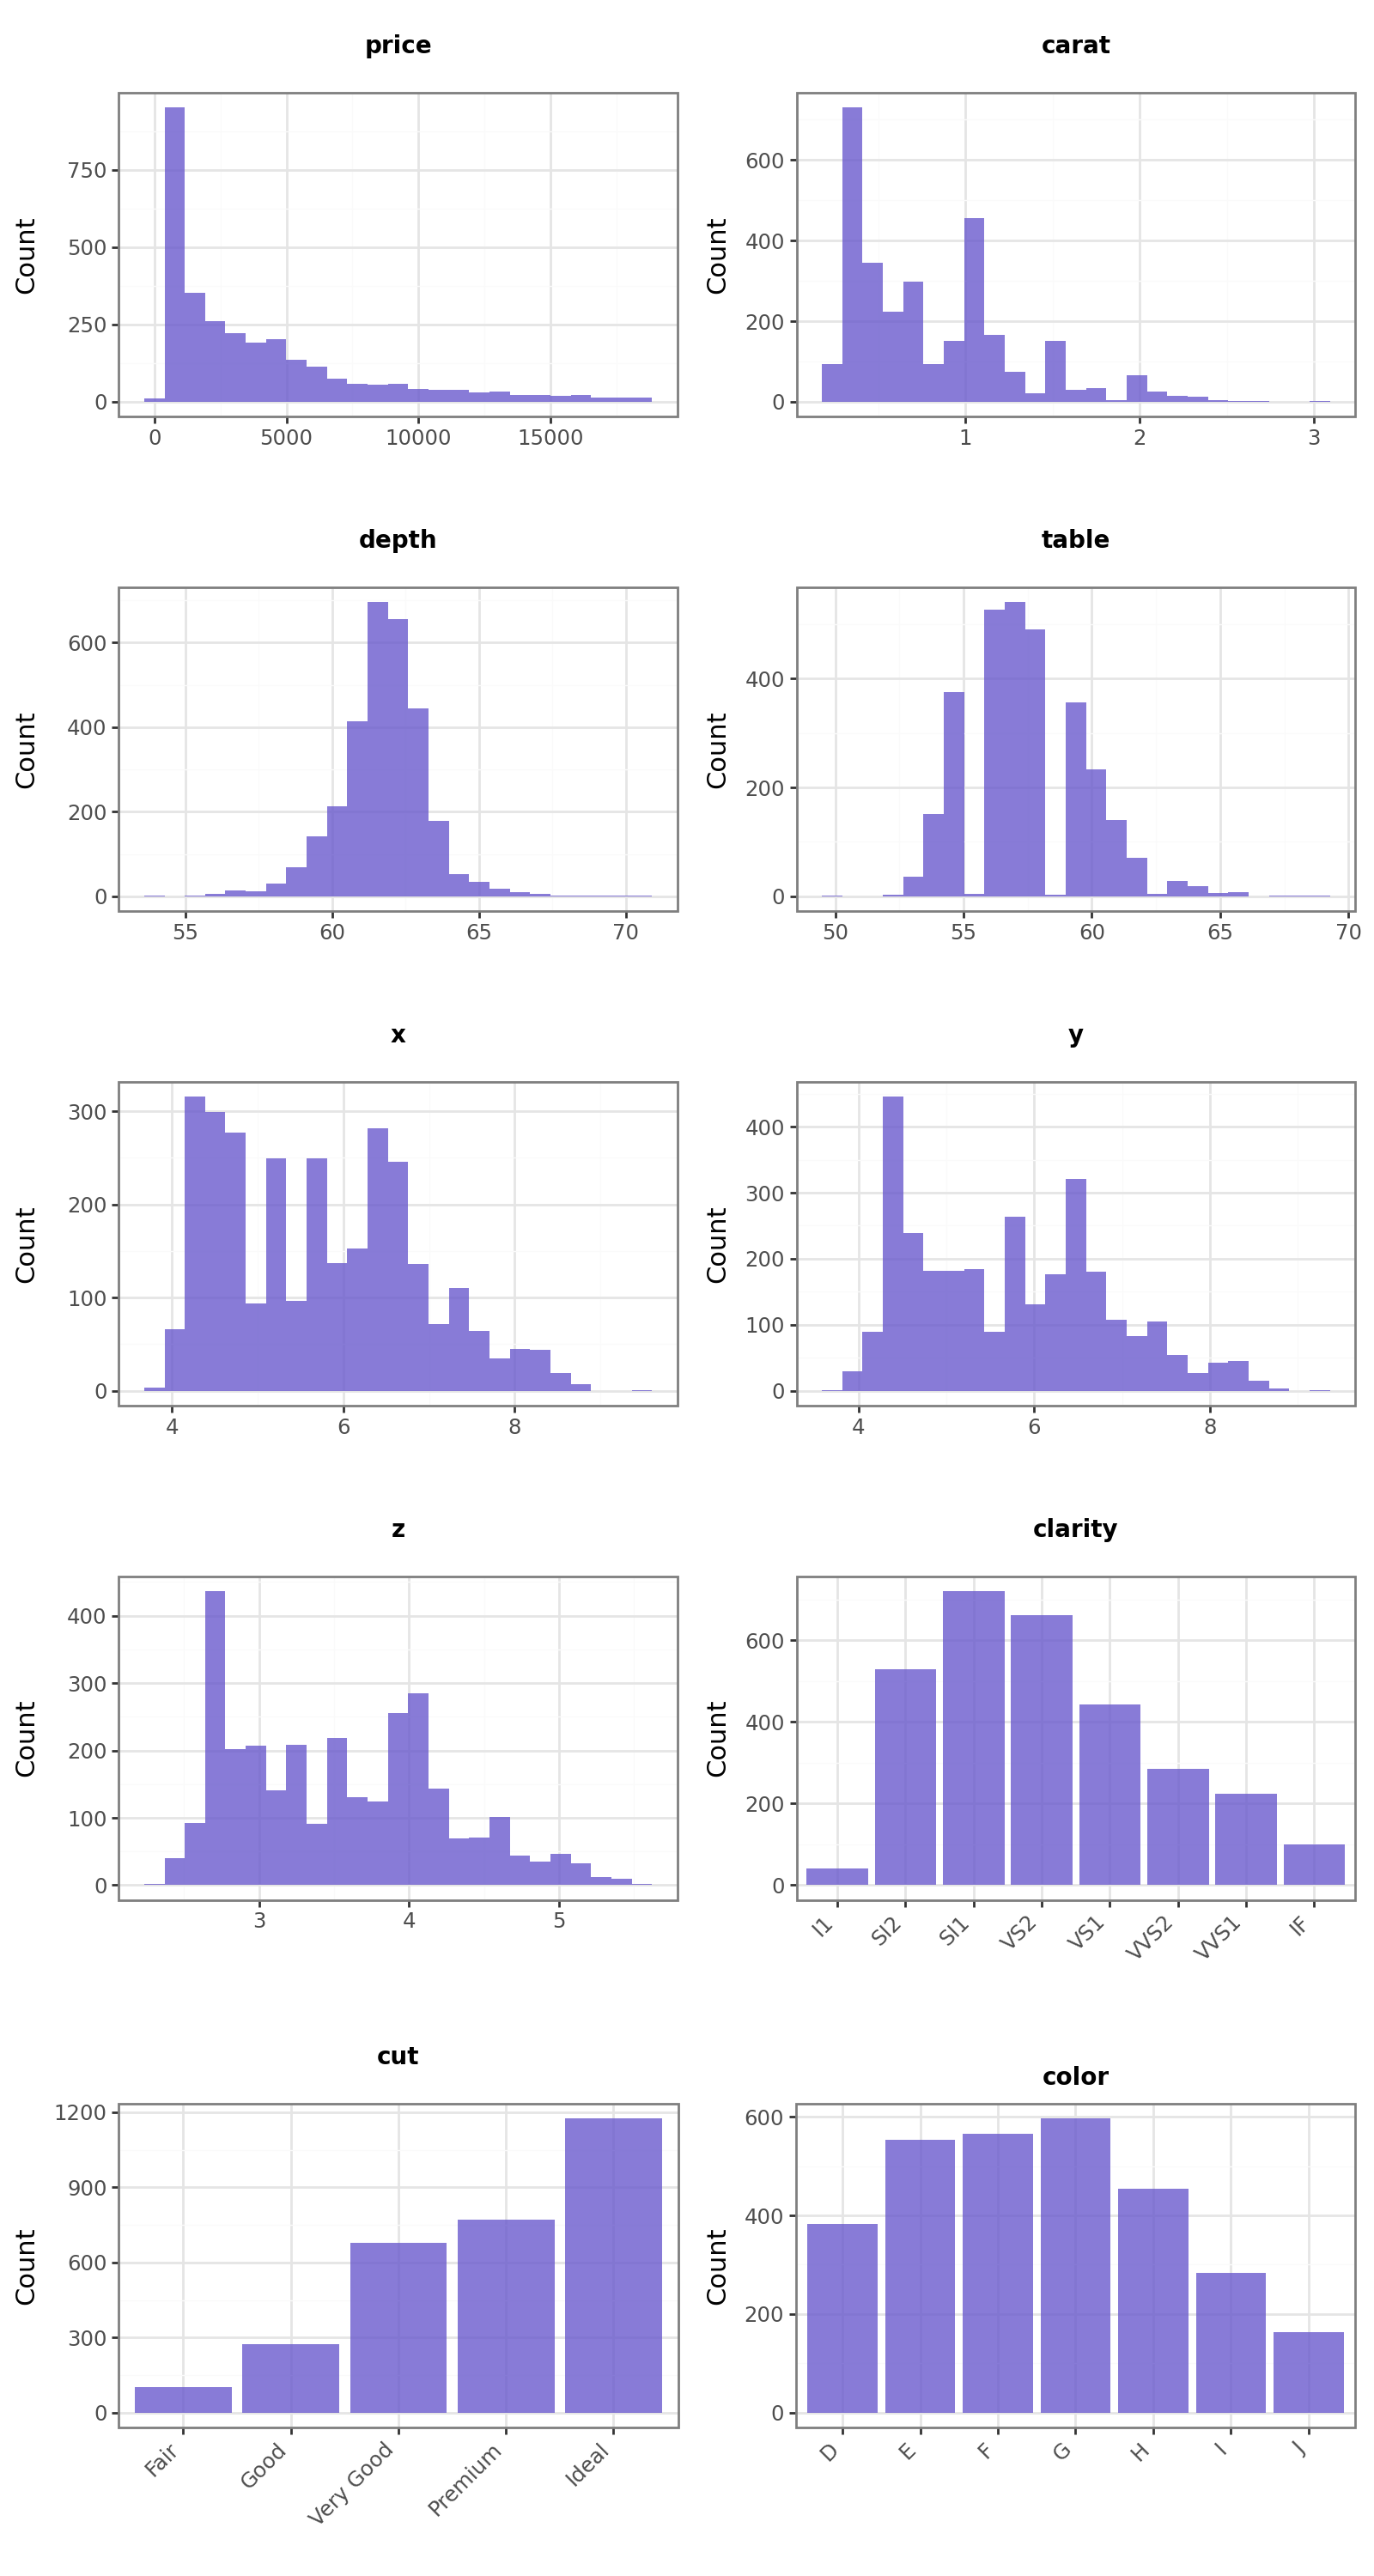

In [5]:
rsm.eda.distr(diamonds).plot()

## Select Specific Columns

Use `cols` to focus on specific variables.

In [6]:
rsm.eda.distr(diamonds, cols=["price", "carat", "cut"]).summary()

Distribution Analysis
Data    : Not provided
Columns : 3 (2 numeric, 1 categorical, 0 other)

--- Numeric Variables ---
┌───────────┬──────────┬───────┐
│ statistic ┆ price    ┆ carat │
╞═══════════╪══════════╪═══════╡
│ mean      ┆ 3907.186 ┆ 0.794 │
│ median    ┆ 2407.0   ┆ 0.7   │
│ min       ┆ 338.0    ┆ 0.2   │
│ max       ┆ 18791.0  ┆ 3.0   │
│ sd        ┆ 3956.915 ┆ 0.474 │
└───────────┴──────────┴───────┘

--- Categorical Variables ---

cut (n_unique: 5, mode: Ideal, n_missing: 0):
┌───────────┬───────┬────────────┐
│ cut       ┆ count ┆ proportion │
╞═══════════╪═══════╪════════════╡
│ Ideal     ┆ 1176  ┆ 0.392      │
│ Premium   ┆ 771   ┆ 0.257      │
│ Very Good ┆ 677   ┆ 0.226      │
│ Good      ┆ 275   ┆ 0.092      │
│ Fair      ┆ 101   ┆ 0.034      │
└───────────┴───────┴────────────┘


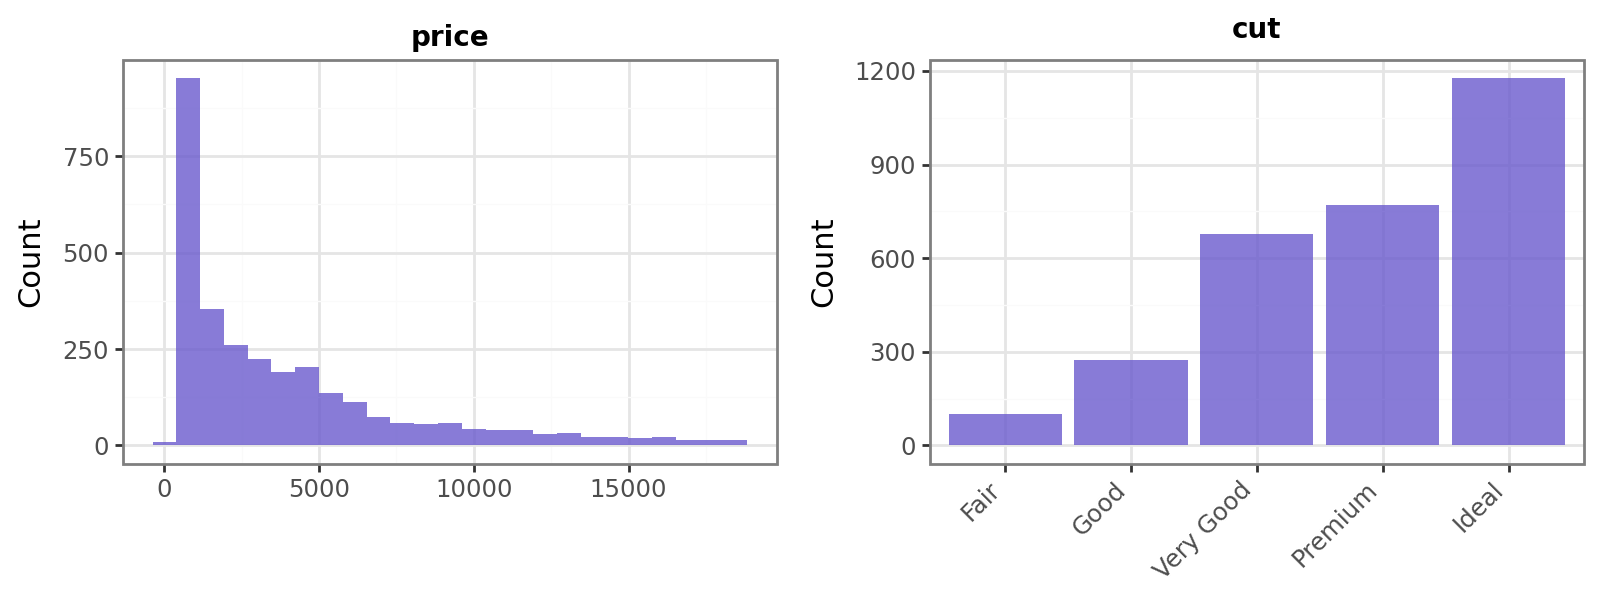

In [7]:
rsm.eda.distr(diamonds, cols=["price", "cut"]).plot()

## Grouped Statistics

Use `by` to compute distribution statistics within groups.

In [8]:
rsm.eda.distr(diamonds, by="cut").summary()

Distribution Analysis
Data    : Not provided
Group by: cut
Columns : 10 (7 numeric, 2 categorical, 1 other)

--- Numeric Variables ---
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ cut ┆ pri ┆ pri ┆ pri ┆ pri ┆ pri ┆ car ┆ car ┆ car ┆ car ┆ car ┆ dep ┆ dep ┆ dep ┆ dep ┆ dep ┆ tab ┆ tab ┆ tab ┆ tab ┆ tab ┆ x_m ┆ x_m ┆ x_m ┆ x_m ┆ x_s ┆ y_m ┆ y_m ┆ y_m ┆ y_m ┆ y_s ┆ z_m ┆ z_m ┆ z_m ┆ z_m ┆ z_s │
│     ┆ ce_ ┆ ce_ ┆ ce_ ┆ ce_ ┆ ce_ ┆ at_ ┆ at_ ┆ at_ ┆ at_ ┆ at_ ┆ th_ ┆ th_ ┆ th_ ┆ th_ ┆ th_ ┆ le_ ┆ le_ ┆ le_ ┆ le_ ┆ le_ ┆ ean ┆ edi ┆ in  ┆ ax  ┆ d   ┆ ean ┆ edi ┆ in  ┆ ax  ┆ d   ┆ ean ┆ edi ┆ in  ┆ ax  ┆ d   │
│     ┆ mea ┆ med ┆ min ┆ max ┆ sd  ┆ mea ┆ med ┆ min ┆ max ┆ sd  ┆ mea ┆ med ┆ min ┆ max ┆ sd  ┆ mea ┆ med ┆ min ┆ max ┆ sd  ┆     ┆ an  ┆     ┆     ┆     ┆     ┆ an  ┆     ┆     ┆     ┆     ┆ an  ┆     ┆     ┆

## Customize Plots

Adjust `bins` for histograms and `ncol` for the grid layout.

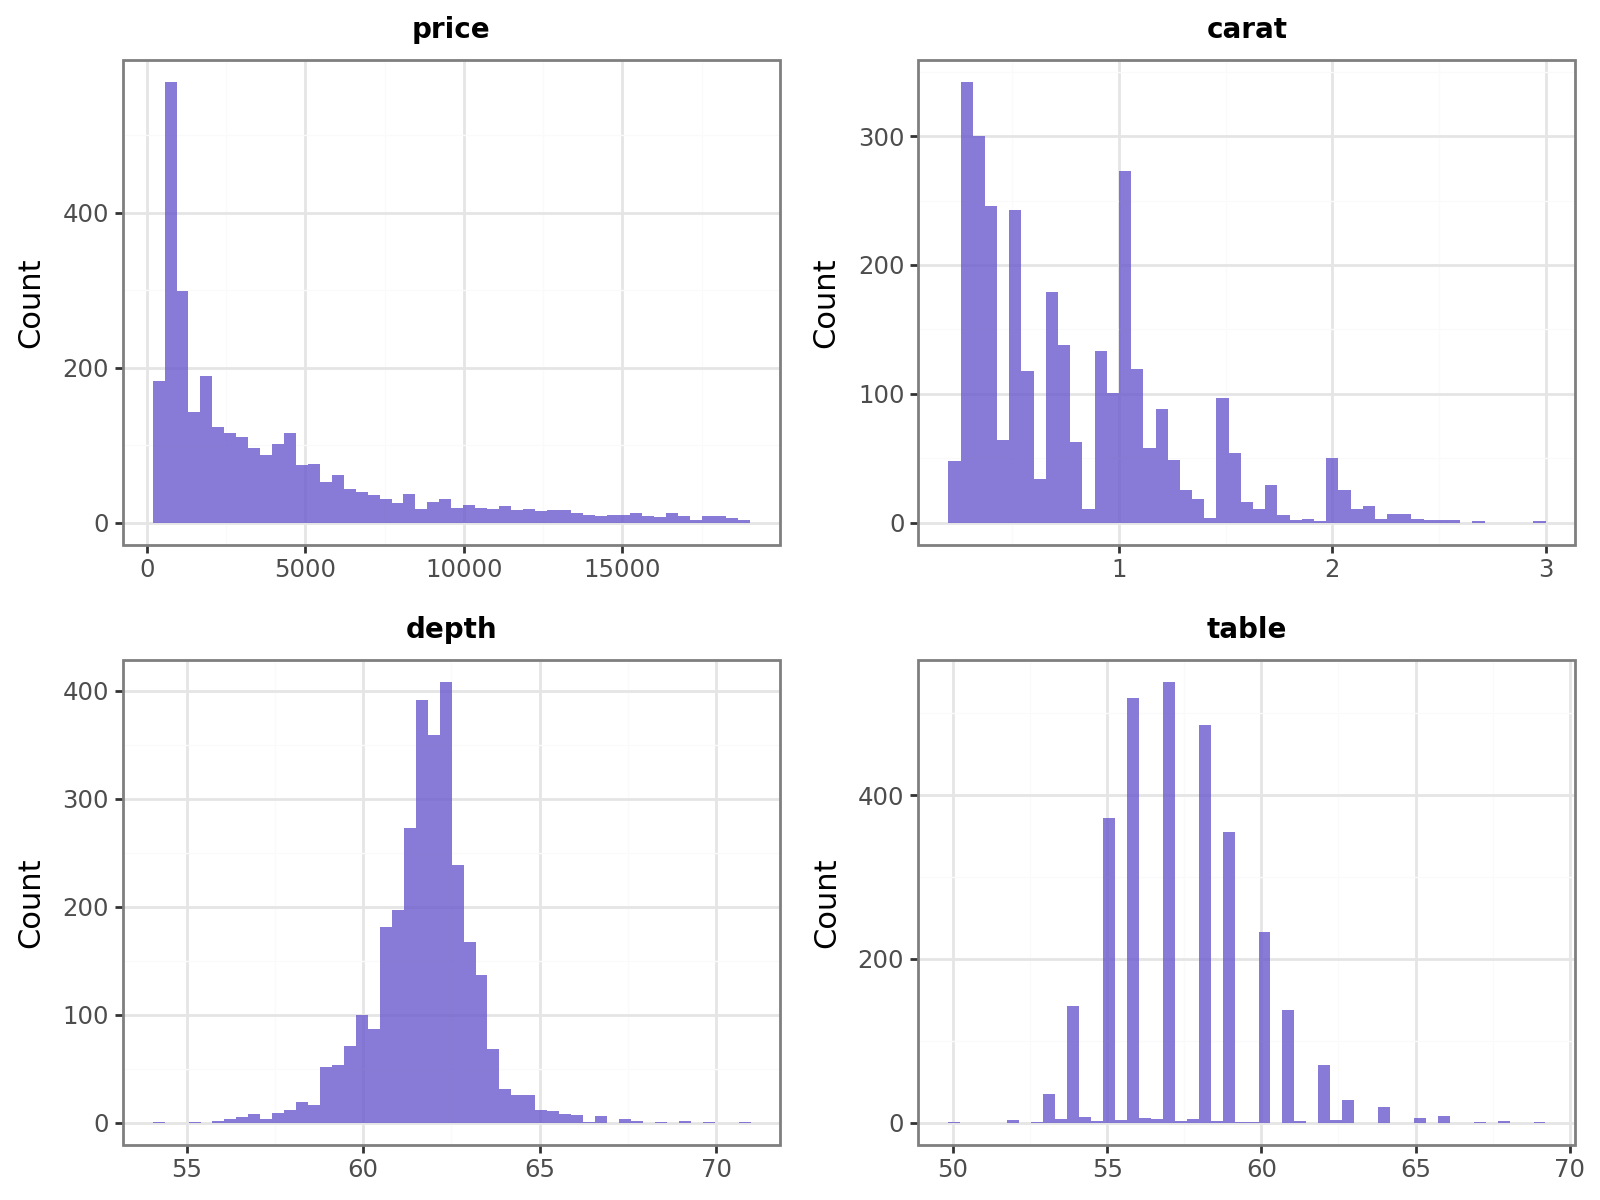

In [9]:
rsm.eda.distr(diamonds, cols=["price", "carat", "depth", "table"]).plot(bins=50, ncol=2)

# Titanic Dataset

The Titanic dataset contains passenger information from the 1912 disaster.

In [10]:
titanic = pl.read_parquet("https://github.com/radiant-ai-hub/pyrsm/raw/refs/heads/main/examples/data/data/titanic.parquet")
titanic.head()

pclass,survived,sex,age,sibsp,parch,fare,name,cabin,embarked
enum,enum,enum,f64,i32,i32,f64,str,str,enum
"""1st""","""Yes""","""female""",29.0,0,0,211.337494,"""Allen, Miss. Elisabeth Walton""","""B5""","""Southampton"""
"""1st""","""Yes""","""male""",0.9167,1,2,151.550003,"""Allison, Master. Hudson Trevor""","""C22 C26""","""Southampton"""
"""1st""","""No""","""female""",2.0,1,2,151.550003,"""Allison, Miss. Helen Loraine""","""C22 C26""","""Southampton"""
"""1st""","""No""","""male""",30.0,1,2,151.550003,"""Allison, Mr. Hudson Joshua Cre…","""C22 C26""","""Southampton"""
"""1st""","""No""","""female""",25.0,1,2,151.550003,"""Allison, Mrs. Hudson J C (Bess…","""C22 C26""","""Southampton"""


In [11]:
rsm.md("https://raw.githubusercontent.com/radiant-ai-hub/pyrsm/refs/heads/main/examples/data/data/titanic_description.md")

## Titanic

This dataset describes the survival status of individual passengers on the Titanic. The titanic data frame does not contain information from the crew, but it does contain actual ages of (some of) the passengers. The principal source for data about Titanic passengers is the Encyclopedia Titanica. One of the original sources is Eaton & Haas (1994) Titanic: Triumph and Tragedy, Patrick Stephens Ltd, which includes a passenger list created by many researchers and edited by Michael A. Findlay.

## Variables

* survival - Survival (Yes, No)
* pclass - Passenger Class (1st, 2nd, 3rd)
* sex - Sex (female, male)
* age - Age in years
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* fare - Passenger Fare
* name - Name
* cabin - Cabin
* embarked - Port of Embarkation (Cherbourg, Queenstown, Southampton)

##  Notes

`pclass` is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1). If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored.  The following are the definitions used for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws. Some children travelled only with a nanny, therefore parch=0 for them.  As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

Note: Missing values and the `ticket` variable were removed from the data

## Related reading

<a href="http://phys.org/news/2012-07-shipwrecks-men-survive.html" target="_blank">In shipwrecks, men more likely to survive</a>

In [12]:
rsm.eda.distr(titanic).summary()

Distribution Analysis
Data    : Not provided
Columns : 10 (2 numeric, 8 categorical, 0 other)

--- Numeric Variables ---
┌───────────┬────────┬─────────┐
│ statistic ┆ age    ┆ fare    │
╞═══════════╪════════╪═════════╡
│ mean      ┆ 29.813 ┆ 36.603  │
│ median    ┆ 28.0   ┆ 15.75   │
│ min       ┆ 0.167  ┆ 0.0     │
│ max       ┆ 80.0   ┆ 512.329 │
│ sd        ┆ 14.366 ┆ 55.754  │
└───────────┴────────┴─────────┘

--- Categorical Variables ---

pclass (n_unique: 3, mode: 3rd, n_missing: 0):
┌────────┬───────┬────────────┐
│ pclass ┆ count ┆ proportion │
╞════════╪═══════╪════════════╡
│ 3rd    ┆ 500   ┆ 0.479      │
│ 1st    ┆ 282   ┆ 0.27       │
│ 2nd    ┆ 261   ┆ 0.25       │
└────────┴───────┴────────────┘

survived (n_unique: 2, mode: No, n_missing: 0):
┌──────────┬───────┬────────────┐
│ survived ┆ count ┆ proportion │
╞══════════╪═══════╪════════════╡
│ No       ┆ 618   ┆ 0.593      │
│ Yes      ┆ 425   ┆ 0.407      │
└──────────┴───────┴────────────┘

sex (n_unique: 2, mode: m

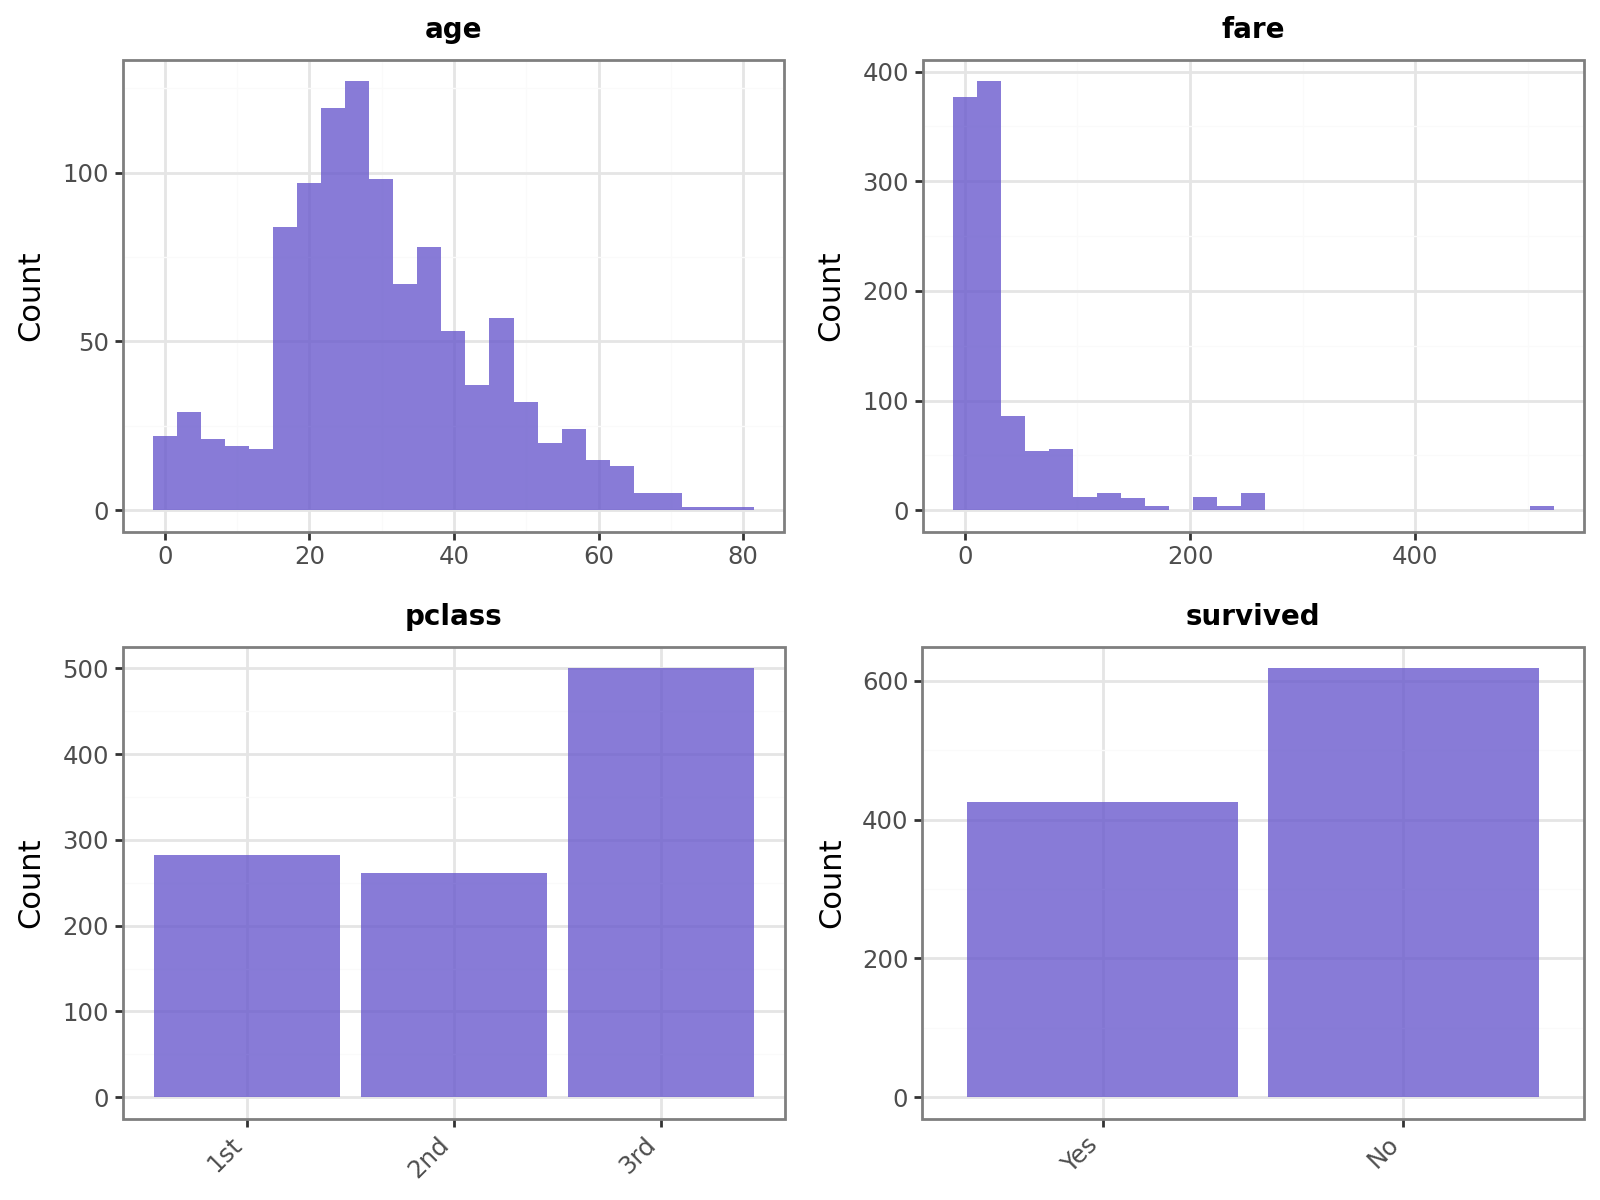

In [13]:
rsm.eda.distr(titanic, cols=["age", "fare", "pclass", "survived"]).plot()

## Handling String and Date Columns

The `distr` function automatically classifies columns by type:

- **Numeric**: Continuous variables get histograms and standard statistics (mean, std, min, max)
- **Categorical**: String, Categorical, and Enum columns get value counts and proportions
- **Other**: Date and datetime columns are summarized with min/max range

String columns like `name` and `cabin` in the Titanic dataset are treated as categorical:

In [14]:
rsm.eda.distr(titanic, cols=["name", "cabin"]).summary()

Distribution Analysis
Data    : Not provided
Columns : 2 (0 numeric, 2 categorical, 0 other)

--- Categorical Variables ---

name (n_unique: 1041, mode: Connolly, Miss. Kate, n_missing: 0):
┌───────────────────────────────────┬───────┬────────────┐
│ name                              ┆ count ┆ proportion │
╞═══════════════════════════════════╪═══════╪════════════╡
│ Connolly, Miss. Kate              ┆ 2     ┆ 0.002      │
│ Kelly, Mr. James                  ┆ 2     ┆ 0.002      │
│ Allen, Miss. Elisabeth Walton     ┆ 1     ┆ 0.001      │
│ Allison, Master. Hudson Trevor    ┆ 1     ┆ 0.001      │
│ Allison, Miss. Helen Loraine      ┆ 1     ┆ 0.001      │
│ Allison, Mr. Hudson Joshua Crei   ┆ 1     ┆ 0.001      │
│ Allison, Mrs. Hudson J C (Bessi   ┆ 1     ┆ 0.001      │
│ Anderson, Mr. Harry               ┆ 1     ┆ 0.001      │
│ Andrews, Miss. Kornelia Theodos   ┆ 1     ┆ 0.001      │
│ Andrews, Mr. Thomas Jr            ┆ 1     ┆ 0.001      │
│ Appleton, Mrs. Edward Dale (Cha   ┆ 1    

The diamonds dataset includes a `date` column, which appears in the "Other Variables" section:

In [15]:
rsm.eda.distr(diamonds, cols=["date"]).summary()

Distribution Analysis
Data    : Not provided
Columns : 1 (0 numeric, 0 categorical, 1 other)

--- Other Variables ---
┌──────────┬──────┬──────────┬───────────┬────────────┬────────────┐
│ variable ┆ type ┆ n_unique ┆ n_missing ┆ min        ┆ max        │
╞══════════╪══════╪══════════╪═══════════╪════════════╪════════════╡
│ date     ┆ Date ┆ 30       ┆ 0         ┆ 2012-02-26 ┆ 2015-12-01 │
└──────────┴──────┴──────────┴───────────┴────────────┴────────────┘


© Vincent Nijs (2026)